# Problème 4 : Générateurs de nombres pseudo-aléatoires

La façon la plus courante de simuler des comportements aléatoires dans un programme informatique est d'utiliser un **générateur de nombres pseudo-aléatoires**. 

Comme son nom l'indique, un générateur de nombres pseudo-aléatoires ne produit pas des nombres réellement aléatoires. Il produit, par une procédure déterministe, une suite de nombres qui *ressemble* à une suite de nombres tirés aléatoirement (selon une loi uniforme sur une certaine plage de nombres).

A partir d'un générateur de nombres pseudo-aléatoires, il est ensuite possible de construire d'autres fonctions aléatoires : des fonctions tirant des nombres aléatoirement selon d'autres loi, des fonctions tirant des éléments aléatoirement dans une liste, des fonctions mélangeant aléatoirement une liste, etc.

Dans ce problème, nous allons programmer et étudier un certain type de générateurs : les générateurs à congruence linéaire. Nous utiliserons ensuite ce type de générateurs dans différentes applications.

Pour plus d'informations sur les générateurs pseudo-aléatoires, nous renvoyons au document *Simulation aléatoire* sur la page du cours.

## A. Générateurs à congruence linéaire

Un générateur produit les nombres pseudo-aléatoires de manière séquentielle. Il garde toujours en mémoire le dernier nombre produit (ou les derniers nombres produits). Quand un nouveau nombre est demandé par l'utilisateur, le générateur applique une certaine transformation au dernier nombre produit (ou aux derniers nombres produits) et renvoie le résultat comme nouveau nombre.

Pour initialiser le processus de génération des nombres, un premier nombre doit être fourni au générateur. Ce nombre initial est appelée **graine** (**seed** en anglais). En prenant la même graine à chaque utilisation, on obtiendrait toujours la même suite de nombres, ce qui serait bien peu aléatoire ! En pratique, la graine est donc créée automatiquement à partir de données aléatoires du système (le temps en millisecondes écoulé depuis une date de référence par exemple). Elle peut néanmoins être fixée par l'utilisateur. Pour faire des tests ou du débogage, il est en effet utile de pouvoir générer plusieurs fois la même suite de nombres pseudo-aléatoires.

Dans le cas des **générateurs à congruence linéaire**, seul le dernier nombre produit est gardé en mémoire. La transformation appliquée au dernier nombre pour en produire un nouveau est de la forme :

\begin{equation}
\tag{$\star\star$}
\varphi : x \mapsto ax+c \ \operatorname{mod} m
\end{equation}

où $m \in \mathbb{N}^*$, $a\in\{1,\ldots,m-1\}$, $c\in\{0,\ldots,m-1\}$ et $\operatorname{mod} m$ désigne le reste modulo $m$.

Les nombres $a$, $c$, $m$ sont appelés les **paramètres** du générateur.

En termes mathématiques, les nombres pseudo-aléatoires produits par un générateur à congruence linéaire forment une suite récurrente $(x_n)_{n\in \mathbb{N}}$ définie par :

\begin{equation}
\tag{$\star$}
\begin{cases}
x_0=d\\
x_{n+1}=\varphi(x_n)
\end{cases}
\end{equation}

où $d$ est la graine.

Un générateur à congruence linéaire de paramètres $a$, $c$, $m$ produit des nombres pseudo-aléatoires dans l'ensemble $\{0,\ldots,m-1\}$. Ces nombres pseudo-aléatoires sont censés ressembler à des nombres tirés aléatoirement dans $\{0,\ldots,m-1\}$ selon une loi uniforme.

### A.1. Classe `GCL`

Nous allons d'abord écrire une classe `GCL` pour créer et utiliser des générateurs à congruence linéaire. Un générateur à congruence linéaire sera représenté par les attributs suivants :

 `a`, `c` et `m` : les paramètres du générateur ;
 
 `value` : la valeur *courante* du générateur (c'est-à-dire la dernière valeur pseudo-aléatoire calculée).
 
- Créer une classe `GCL` contenant :
    * la méthode de construction `__init__` ;
    * une méthode `random` ;
    * une méthode `seed`.

La méthode `__init__` de cette classe prendra en paramètres les paramètres du générateur. Par défaut, la valeur initiale (la graine) du générateur sera produite en utilisant la fonction `time` du module `time`.

La méthode `random` appliquera la fontion $\varphi$ à la valeur courante et renverra cette nouvelle valeur.

La méthode `seed` prendra en paramètre une valeur entière et réinitialisera le générateur avec cette valeur entière comme graine (autrement dit, elle remplacera la valeur courante par la valeur fournie).
        
Avec cette classe, voilà par exemple comment créer un générateur de paramètres $(5,1,16)$ et afficher les 2 premiers nombres pseudo-aléatoires produits par ce générateur
```python

rd = GCL(5, 1, 16)
print(rd.random())
print(rd.random())
```

In [3]:
import time


class GCL:
    def __init__(self, a, c, m) -> None:
        self.a = a
        self.c = c
        self.m = m
        self.value = int(time.time_ns()) % self.m
        
        
    def random(self):
        self.value = (self.a * self.value + self.c) % self.m
        return self.value
        
    def seed(self, n):
        self.value = n
        

rd = GCL(5, 1, 16)
print(rd.random())

1


- Créer un générateur `rd` de paramètres $(5,1,16)$ et afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur.

In [4]:
rd = GCL(5, 1, 16)

for i in range(20):
    print(i+1, "=", rd.random())

1 = 5
2 = 10
3 = 3
4 = 0
5 = 1
6 = 6
7 = 15
8 = 12
9 = 13
10 = 2
11 = 11
12 = 8
13 = 9
14 = 14
15 = 7
16 = 4
17 = 5
18 = 10
19 = 3
20 = 0


- Fixer la graine du générateur à 10. Afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur avec cette graine.

In [5]:
rd = GCL(5, 1, 16)
rd.seed(10)
for i in range(20):
    print(i+1, "=", rd.random())

1 = 3
2 = 0
3 = 1
4 = 6
5 = 15
6 = 12
7 = 13
8 = 2
9 = 11
10 = 8
11 = 9
12 = 14
13 = 7
14 = 4
15 = 5
16 = 10
17 = 3
18 = 0
19 = 1
20 = 6


### A.2. Période des suites générées

* Rappeler la définition d'une suite **périodique** et la définition de la **période** d'une suite périodique.

<font color=blue>

$$\exists r \in \mathbb{N} \, \forall n \in \mathbb{N} : \text{Une suite périodique suit la propriété } x_{n+r} = x_n$$


    
</font>

* Montrer qu'une suite récurrente qui prend la même valeur à deux rangs distincts $n_1$ et $n_2$ est nécessairement périodique (à partir du rang $n_1$). Que peut-on dire de sa période ?

<font color=blue>
    
Nous allons démontrer que la suite se répète à partir du rang \(n_1\).

Soit \(x_n\) une suite récurrente qui prend la même valeur à deux rangs distincts \(n_1\) et \(n_2\), c'est-à-dire \(x_{n_1} = x_{n_2}\). Nous souhaitons montrer que la suite est périodique à partir du rang \(n_1\).

Soit \(r = n_2 - n_1\). Regardons les termes de la suite à partir du rang \(n_1\) :

\[
\begin{align*}
x_{n_1} &= x_{n_2}  \\
x_{n_1 + r} &= x_{n_2 + r}  \\
x_{n_1 + 2r} &= x_{n_2 + 2r}  \\
&\vdots
\end{align*}
\]

Ont peut voir que la suite \(x_n\) prend la même valeur à chaque rang \(n_1 + kr\) pour tout \(k = 0, 1, 2, \ldots\). Par conséquent, la suite est périodique à partir du rang \(n_1\) avec une période égale à \(r\), où \(r = n_2 - n_1\).

Finalement si une suite récurrente prend la même valeur à deux rangs distincts \(n_1\) et \(n_2\), alors elle est nécessairement périodique à partir du rang \(n_1\), avec une période \(r\) telle que \(r = n_2 - n_1\).

</font>

Le **principe des tiroirs** énonce que si l'on range $n$ chaussettes dans $m$ tiroirs (avec $n>m$), alors il y au moins un tiroir contenant plus d'une chaussette.

Par exemple, si l'on considère $n$ nombres ne pouvant prendre que $m$ valeurs différentes (avec $n>m$), alors, d'après le principe des tiroirs, il y a nécessairement deux nombres ayant la même valeur. 

* Soit $(x_n)_{n\in\mathbb{N}}$ une suite du type $(\star)$. En appliquant le principe de tiroirs aux nombres $x_0, x_1, \ldots, x_m$, montrer que la suite $(x_n)_{n\in\mathbb{N}}$ est périodique (à partir d'un certain rang). Que peut-on dire de sa période ?

<font color=blue>

il existe deux indices distincts $n_i$ et $n_j$ tels que $x_{n_i} = x_{n_j}$, où $n_i < n_j$ <br>
En appliquant le principe des tiroirs aux valeurs de la suite $(x_n){n\in\mathbb{N}}$, on montre que la suite est périodique à partir du rang $n_i$, avec une période égale à $n_j - n_i$ où $x{n_i} = x_{n_j}$.
    
</font>

Il est préférable d'utiliser un générateur qui produit des suites de périodes les plus longues possibles. On dit qu'un générateur de paramètres $(a,c,m)$ est de **période maximale** s'il produit des suites de période $m$ pour toutes les graines.

On peut démontrer que si un générateur produit une suite de période $m$ pour une graine particulière, alors il produit des suites de période $m$ pour toutes les graines.

- Pour chacun des paramètres ci-dessous, déterminer (expérimentalement) si le générateur à congruence linéaire associé est de période maximale.
    - $(5, 4, 8)$
    - $(5, 5, 8)$
    - $(5, 1, 16)$
    - $(7, 1, 16)$

In [6]:
import time


class GCL:
    def __init__(self, a, c, m) -> None:
        self.a = a
        self.c = c
        self.m = m
        self.value = int(time.time_ns()) % self.m
        
        
    def random(self):
        self.value = (self.a * self.value + self.c) % self.m
        return self.value
        
    def seed(self, n):
        self.value = n
        

rd1 = GCL(5, 4, 8)
rd2 = GCL(5, 5, 8)
rd3 = GCL(5,1,16)
rd4 = GCL(7,1,16)

for i in range(20):
    rd1.seed(i)
    print(i, '=', rd1.random())

0 = 4
1 = 1
2 = 6
3 = 3
4 = 0
5 = 5
6 = 2
7 = 7
8 = 4
9 = 1
10 = 6
11 = 3
12 = 0
13 = 5
14 = 2
15 = 7
16 = 4
17 = 1
18 = 6
19 = 3


On dispose du théorème suivant pour déterminer si un générateur est de période maximale.

**Théorème.** Dans le cas où $m=2^e$, avec $e$ un paramètre donné, un générateur est de période maximale si et seulement si $c$ est impair et $a \equiv 1 \pmod 4$. 

* Vérifier qu'en appliquant ce théorème aux 4 générateurs précédents, on retrouve les résultats déterminés expérimentalement.

<font color=blue>
    
Le théorème stipule que, dans le cas où m est une puissance de 2 (c'est-à-dire m = 2^e), un générateur est de période maximale ssi les conditions suivantes sont remplies :

- c est impair.
- a ≡ 1 (mod 4).

Générateur (a, c, m) = (5, 4, 8):

Condition 1 : c = 4 n'est pas impair.
Condition 2 : a = 5 ≡ 1 (mod 4) est satisfaite.
En conséquence, ce générateur ne peut pas être de période max.

Générateur (a, c, m) = (5, 5, 8):

Condition 1 : c = 5 est impair.
Condition 2 : a = 5 ≡ 1 (mod 4) est satisfaite.
Il est bien de periode max

Générateur (a, c, m) = (5, 1, 16):

Condition 1 : c = 1 est impair.
Condition 2 : a = 5 ≡ 1 (mod 4) est satisfaite.
Il est bien de periode max

Générateur (a, c, m) = (7, 1, 16):

Condition 1 : c = 1 est impair.
Condition 2 : a = 7 ≡ 3 (mod 4) n'est pas équivalent à 1 (mod 4).
Pas de periode max
    
</font>

### A.3. Tests de quelques générateurs à congruence linéaire

- Créer les générateurs à congruence linéaire de paramètres suivants :
    - `rd1` : $(9,5,2^{31})$
    - `rd2` : $(11,5,2^{31})$
    - `rd3` : $(1664523,1013904223,2^{31})$
    - `rd4` : $(1664525,1013904223,2^{31})$

In [7]:
rd1 = GCL(9, 5, 2**31)
rd2 = GCL(11, 5, 2**31)
rd3 = GCL(1664523,1013904223, 2**31)
rd4 = GCL(1664525,1013904223, 2**31)
print(rd1.random(),rd2.random(),rd3.random(),rd4.random())

1093698073 143695617 1410714203 460711747


* Ces générateurs sont-ils de période maximale ?

<font color=blue>
    
Générateur rd1 : (a, c, m) = (9, 5, 2^31).

Condition 1 : c = 5 est impair.
Condition 2 : a = 9 ≡ 1 (mod 4) est satisfaite.
Il est de periode max

Générateur rd2 : (a, c, m) = (11, 5, 2^31).

Condition 1 : c = 5 est impair.
Condition 2 : a = 11 ≡ 3 (mod 4) n'est pas équivalent à 1 (mod 4).
rd2 n'est pas de période max.

Générateur rd3 : (a, c, m) = (1664523, 1013904223, 2^31).

Condition 1 : c = 1013904223 est impair.
Condition 2 : a = 1664523 ≡ 3 (mod 4) n'est pas équivalent à 1 (mod 4).
rd3 n'est pas de période max.


Générateur rd4 : (a, c, m) = (1664525, 1013904223, 2^31).

Condition 1 : c = 1013904223 est impair.
Condition 2 : a = 1664525 ≡ 1 (mod 4) est satisfaite.
rd4 est de periode max.
    
</font>

**Premier test.** Soit $n$ un entier fixé et $m$ un entier grand devant $n$. Si l'on tire aléatoirement un nombre $x$ dans $\{0,\ldots,m-1\}$ suivant une loi uniforme, il y a (à peu près) autant de chance que $x \equiv 0 \pmod n$ ou que $x \equiv 1 \pmod n$ ou que $x \equiv 2 \pmod n$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété.

- Ecrire une fonction `test_modulo` qui tire un échantillon de nombres pseudo-aléatoires produits par un générateur, calcule les congruences modulo $n$ (où $n$ est donné) et affiche la répartition des congruences sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, `nbsample`, la taille de l'échantillon, et `n`, le nombre modulo lequel on calcule les congruences. Indication : Pour tracer l'histogramme, on pourra utiliser la commande `bar` du module `matplotlib.pyplot` (voir document sur Matplotlib sur la page du cours).

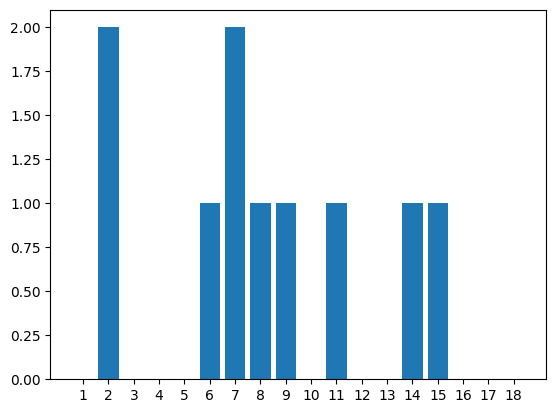

[0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]


In [8]:
import matplotlib.pyplot as plt

def test_modulo(rd, nbsample, n):
    liste = [0]*n
    liste2 = []
    for i in range(nbsample):
        
        nombre = rd.random() % n
        liste[nombre] += 1
    for i in range(len(liste)):
        liste2.append(str(i+1))
    
    plt.bar(liste2, liste)
    plt.show()
    return liste

print(test_modulo(rd1, 10, 18))
           

- Tester les différents générateurs pour des congruences modulo 10 avec des échantillons de 10 000 nombres.

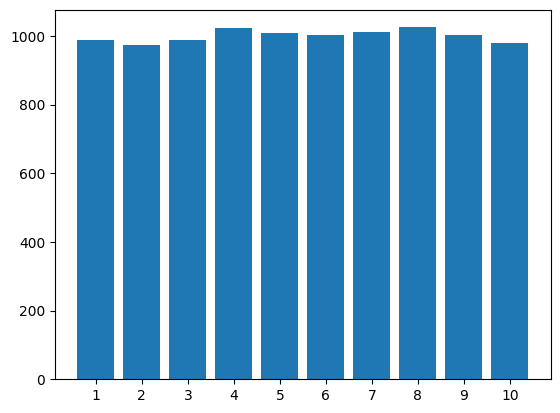

[988, 972, 989, 1023, 1009, 1002, 1011, 1025, 1003, 978]


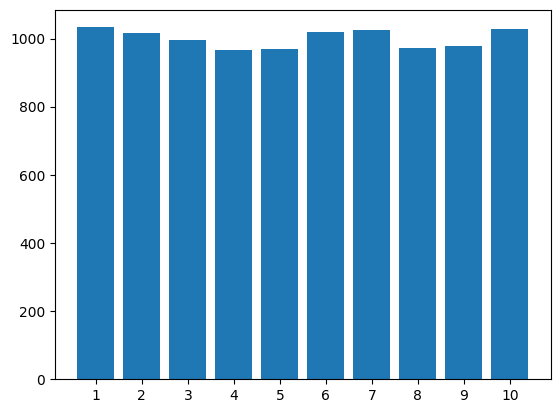

[1033, 1016, 995, 965, 969, 1018, 1025, 973, 978, 1028]


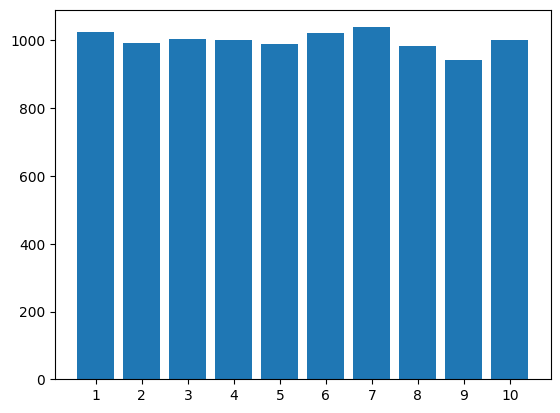

[1025, 993, 1005, 1001, 990, 1021, 1039, 985, 941, 1000]


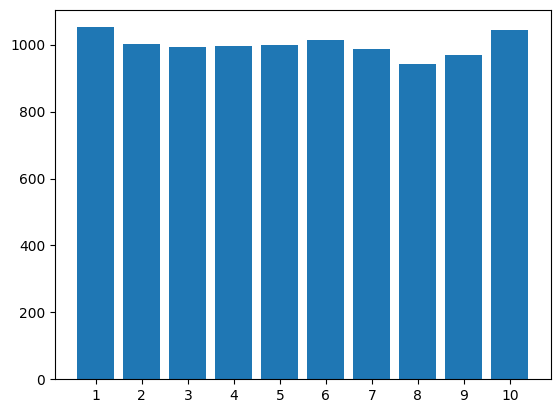

[1052, 1002, 993, 997, 1000, 1014, 986, 942, 969, 1045]


In [9]:
print(test_modulo(rd1, 10000, 10))
print(test_modulo(rd2, 10000, 10))
print(test_modulo(rd3, 10000, 10))
print(test_modulo(rd4, 10000, 10))


- Tester les différents générateurs pour des congruences modulo 4 avec des échantillons de 4 000 nombres.

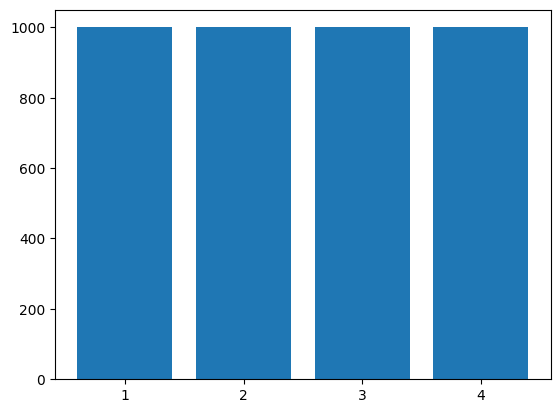

[1000, 1000, 1000, 1000]


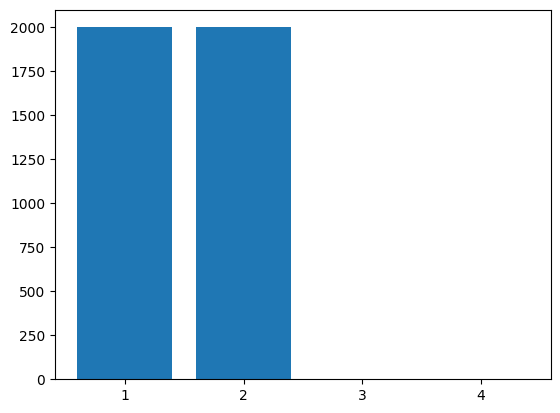

[2000, 2000, 0, 0]


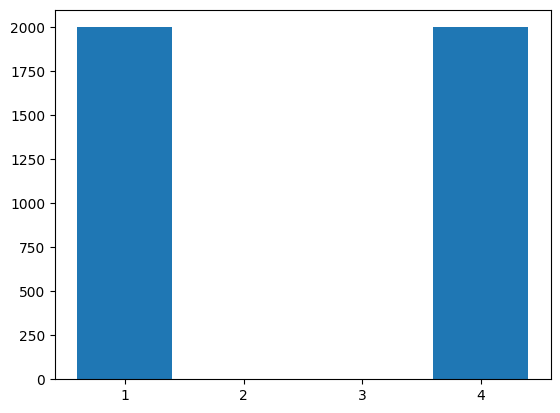

[2000, 0, 0, 2000]


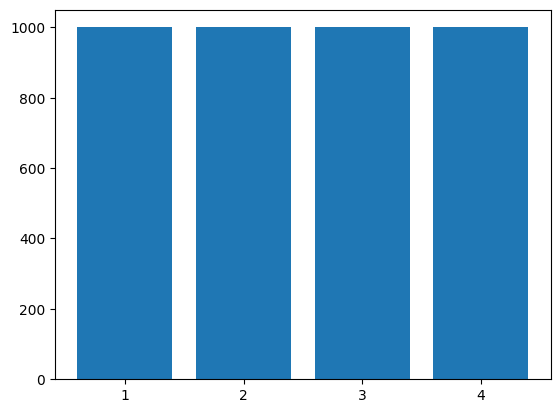

[1000, 1000, 1000, 1000]


In [10]:
print(test_modulo(rd1, 4000, 4))
print(test_modulo(rd2, 4000, 4))
print(test_modulo(rd3, 4000, 4))
print(test_modulo(rd4, 4000, 4))


- Parmi les générateurs, lesquels réussissent ce premier test ?

<font color=blue>
    
Ils ont tous reussi cependant rd3 et rd4 avec 4000 essais et en travaillant modulo 4 ne se repartie pas correctement
    
</font>

**Deuxième test.** Si l'on tire aléatoirement trois nombres $x_1,x_2,x_3$ de façon indépendante, suivant une même loi, il y autant de chance que $x_1<x_2<x_3$ ou que $x_1<x_3<x_2$ ou que $x_2<x_1<x_3$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété.

- Ecrire une fonction `test_ordre` qui tire un échantillon de triplets de nombres pseudo-aléatoires produits par un générateur, détermine l'ordre de ces triplets et affiche la répartition des ordres trouvés dans l'échantillon sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, et `nbsample`, la taille de l'échantillon.

In [11]:
def test_ordre(rd: tuple, nbsample: int):
    x1x2x3 = 0
    x1x3x2 = 0
    x2x1x3 = 0
    x2x3x1 = 0
    x3x1x2 = 0
    x3x2x1 = 0
    for i in range(nbsample):
        if rd1.random() <= rd2.random() <= rd3.random():
            x1x2x3 += 1
        if rd1.random() <= rd3.random() <= rd2.random():
            x1x3x2 += 1
        if rd2.random() <= rd1.random() <= rd3.random():
            x2x1x3 += 1
        if rd2.random() <= rd3.random() <= rd1.random():
            x2x3x1 += 1
        if rd3.random() <= rd1.random() <= rd2.random():
            x3x1x2 += 1
        if rd3.random() <= rd2.random() <= rd1.random():
            x3x2x1 += 1
    
    plt.bar([1,2,3,4,5,6], [x1x2x3, x1x3x2, x2x1x3,x2x3x1, x3x1x2,x3x2x1])




* Tester avec un échantillon de 60 000 triplets de nombres

None


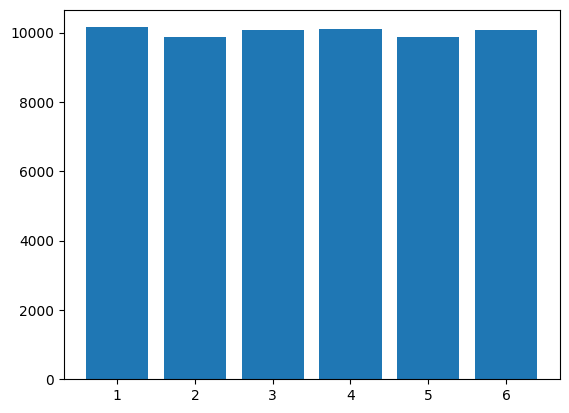

In [12]:
print(test_ordre((rd1.random(),rd2.random(),rd3.random()), 60000))

* Parmi les générateurs, lesquels réussissent ce deuxième test ?

<font color=blue>
    
-- *Ecrire la réponse ici.* --
    
</font>

* Finalement, au vu de ces deux tests, quels générateurs semblent être de bons générateurs.

<font color=blue>
    
-- *Ecrire la réponse ici.* --
    
</font>

### A.4. Générateur du module `random`

* Quel type de générateur est utilisé dans le module `random` de Python ? Quelle est sa période ?

<font color=blue>
    
-- *Ecrire la réponse ici.* --
    
</font>

## B. Fonctions aléatoires complémentaires

* Compléter la classe `GCL` avec les méthodes suivantes.
    * `uniform` prend en paramètres deux réels `a` et `b` et renvoie un nombre réel tiré selon une loi uniforme sur l'intervalle $[a, b]$.
    * `randint`prend en paramètres deux entiers `a` et `b` renvoie un nombre entier tiré selon une loi uniforme entre `a` et `b-1`.
    * `choice` prend en paramètre une liste et renvoie un élément de la liste tiré aléatoirement.
    * `sample` prend en paramètre une liste `lst` et un entier `k`, et renvoie une liste de longueur `k` composée d'éléments tirés aléatoirement sans remise dans `lst`.
    
Indication pour la méthode `uniform` : En divisant par $m$ le nombre entier pseudo-aléatoire fourni par la méthode `random`, on obtient un nombre réel pseudo-aléatoire entre $0$ et $1$ ($1$ exclu). Il suffit ensuite d'appliquer une certaine transformation affine pour obtenir un nombre réel pseudo-aléatoire entre $a$ et $b$ ($b$ exclu).

Indication pour la méthode `randint` : Arrondir (inférieurement) le nombre réel pseudo-aléatoire fourni par l'appel à la méthode `uniform` sur l'intervalle $[a, b]$.

Indication pour la méthode `choice` : Utiliser la méthode `randint`.
    
```py
>>> rd = GCL(1664525, 1013904223, 2**31)

>>> rd.uniform(1.5, 3.5)
3.185575816487498
>>> rd.uniform(1.5, 3.5)
2.972734514132826

>>> rd.randint(10, 15)
10
>>> rd.randint(10, 15)
13

>>> lst = ['A', 'B', 'C', 'D']
>>> rd.choice(lst)
'C'
>>> rd.choice(lst)
'A'
```

In [13]:
import time


class GCL:
    def __init__(self, a, c, m) -> None:
        self.a = a
        self.c = c
        self.m = m
        self.value = int(time.time_ns()) % self.m
        
    def random(self):
        self.value = (self.a * self.value + self.c) % self.m
        return self.value
        
    def seed(self, n):
        self.value = n

    def uniform(self, a, b):
        rand = self.random() / self.m
        return a + rand * (b - a)
        
rd = GCL(1664525, 1013904223, 2**31)

print(rd.uniform(1.5, 3.5))

1.8999875066801906


## C. Applications

Pour les applications proposées ici, on utilisera un (bon) générateur à congruence linéaire.

### C.1. Simulation de la marche d'un ivrogne

On considère un ivrogne qui se déplace dans le plan. Il part du point de coordonnées $(0,0)$. A chaque étape, il fait un déplacement de longueur 1, aléatoirement dans l'une des quatre directions (vers le haut, vers le bas, à gauche ou à droite).

Voilà un exemple d'une telle marche d'ivrogne :
```
(0, 0)
(-1, 0)
(-1, -1)
(-1, 0)
(-2, 0)
(-2, 1)
(-3, 1)
(-3, 0)
etc.
```

* Ecrire une fonction `trace_marche` qui prend en paramètres un générateur aléatoire `rd` et un nombre d'étapes `n`, et qui simule une marche d'ivrogne à `n` étapes et l'affiche dans une fenêtre graphique.

* Tracer trois marches d'ivrogne à  10 000 étapes.

### C.2. Calcul de $\pi$ par une méthode aléatoire

En considère un carré de côté 1 et un quart de disque inscrit dans ce carré comme dans la figure ci-dessous.

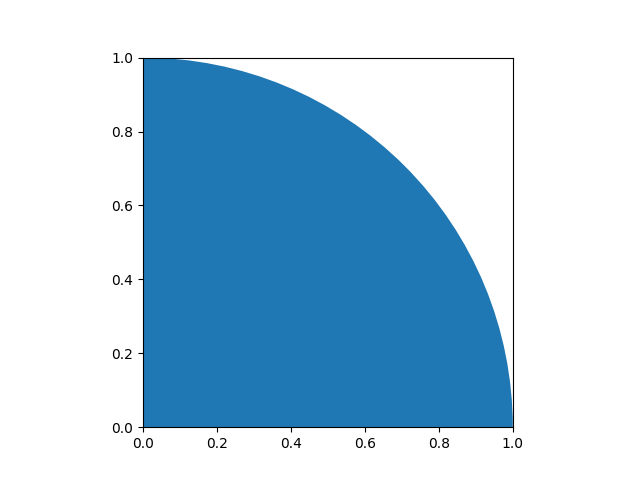

Si l'on tire un point au hasard dans ce carré, la probabilité que ce point soit dans le quart de disque est :

$$
\frac{\textrm{aire du quart de disque}}{\textrm{aire du carré}}.
$$

Ce rapport vaut $\displaystyle \frac{\pi}{4}$. Une façon de calculer $\pi$ consiste donc à tirer beaucoup de points au hasard dans le carré et à calculer la proportion de points qui tombent dans le quart de disque. Cette proportion multipliée par 4 donne une approximation de $\pi$.

* Ecrire une fonction `montecarlo` qui prend en paramètres un générateur aléatoire `rd` et un entier `n`, et calcule une approximation de $\pi$ selon la méthode décrite plus haut en utilisant `n` points. Cette fonction affichera également une représentation graphique des points tirés (avec une couleur différente selon qu'ils sont ou non dans le quart de disque).

* Calculer une approximation de $\pi$ avec 10 000 points.

* Combien de décimales correctes de $\pi$ retrouve-t-on dans cette approximation ? Cette méthode vous semble-t-elle efficace ?

<font color=blue>
    
-- *Ecrire la réponse ici.* --
    
</font>

### C.3. Vignettes à collectionner

A la veille d'une Coupe du Monde, on se pose la question suivante : Combien faut-il acheter de paquets de vignettes pour être (presque) sûr de compléter un album de vignettes ?

Pour formaliser cette question, on considère que l'album doit être rempli avec $n$ vignettes et que chaque paquet contient $p$ vignettes. La composition des paquets est aléatoire, toutes les vignettes apparaissant avec la même fréquence, mais il ne peut pas y avoir deux vignettes identiques dans un même paquet.

* Ecrire une fonction `sim_album` qui simule le remplissage d'un album et renvoie le nombre de paquets nécessaire à ce remplissage. Cette fonction prendra en paramètres le nombre de vignettes de l'album et le nombre de vignettes dans les paquets. Remarque : Cette fonction étant basée sur une simulation aléatoire, il est normal que chaque appel renvoie une valeur différente.

* On se place dans le cas où $n=20$ et $p=5$. Effectuer $1000$ simulations de remplissage d'album et représenter à l'aide d'un histogramme la répartition du nombre de paquets nécessaires pour remplir un album.

* On se place toujours dans le cas où $n=20$ et $p=5$. En effectuant $1000$ simulations, estimer le nombre minimum de paquets à acheter pour être sûr à 90% de remplir totalement son album.

* L'album officiel de la Coupe du Monde 2022 contient 670 vignettes et les paquets contiennent 5 vignettes. Estimer le nombre minimum de paquets à acheter pour être sûr à 90% de remplir totalement son album.